In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 70)
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
supply_v2 = pd.read_csv("Office_Supply_V2.csv")

In [3]:
supply_v2.head()

,historical_sales_volume,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,repurchase_method_NOTICE,last_transaction_channel_known,number_of_employees_large,number_of_employees_medium,number_of_employees_small,language_english,days_since_first_purchase,prior_purchases,campaign_period_sales_positive
0,146803.428571,15.0,0,0,0,1,0,0,1,1,18927,2,1
1,439984.160000,22.0,0,0,1,1,0,0,0,1,14287,1,1
2,970465.714286,19.0,0,0,1,1,0,0,1,1,21088,1,1
3,230193.600000,17.0,0,0,1,1,0,0,1,1,13571,1,0
4,27403.333333,21.0,0,0,1,1,0,0,0,0,12066,1,1


In [4]:
X = supply_v2.drop('campaign_period_sales_positive', axis = 1)
y = supply_v2.campaign_period_sales_positive

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size = .2, random_state = 101)

In [359]:
supply_v2['campaign_period_sales_positive'].value_counts(normalize=True)

0    0.729235
1    0.270765
Name: campaign_period_sales_positive, dtype: float64

In [360]:
from sklearn.dummy import DummyClassifier
dummy_baseline = DummyClassifier(strategy="most_frequent")
dummy_baseline.fit(X_test, y_test)

test_target_pred = dummy_baseline.predict(X_test)

score = dummy_baseline.score(X_test, y_test)
print(score)

0.7334570191713049


In [363]:
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LRM  ', LogisticRegression(random_state = 101, solver='newton-cg', max_iter=1000)))
models.append(('LDA  ', LinearDiscriminantAnalysis()))
models.append(('KNN  ', KNeighborsClassifier()))
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 101)))
models.append(('GNB  ', GaussianNB()))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 101)))
models.append(('ABM  ', AdaBoostClassifier()))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('RFM  ', RandomForestClassifier(n_estimators=87, random_state=101)))
models.append(('ExT  ', ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : 0.776266 (0.005001)
LDA    : 0.775802 (0.004606)
KNN    : 0.766602 (0.005588)
CART   : 0.796444 (0.005178)
GNB    : 0.791419 (0.006917)
KSVM   : 0.728179 (0.000155)
ABM    : 0.864167 (0.007486)
GBM    : 0.868419 (0.006031)
RFM    : 0.855818 (0.004414)
ExT    : 0.822188 (0.008225)


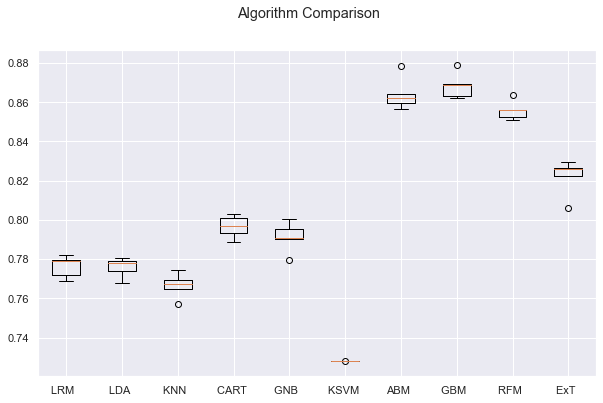

In [364]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [365]:
# Class count
#df_train = autinsurance
count_class_0, count_class_1 = supply_v2.campaign_period_sales_positive.value_counts()

# Divide by class
df_class_0 = supply_v2[supply_v2['campaign_period_sales_positive'] == 0]
df_class_1 = supply_v2[supply_v2['campaign_period_sales_positive'] == 1]

In [366]:
df_class_0_under = df_class_0.sample(count_class_1)
df_class_0_under.shape

(4378, 13)

Random under-sampling:
1    4378
0    4378
Name: campaign_period_sales_positive, dtype: int64


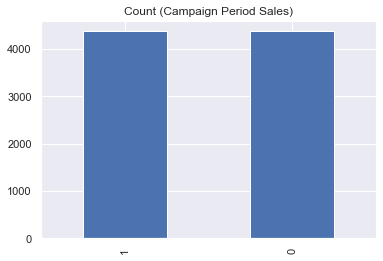

In [367]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.campaign_period_sales_positive.value_counts())

df_test_under.campaign_period_sales_positive.value_counts().plot(kind='bar', title='Count (Campaign Period Sales)');

In [368]:
X = df_test_under.drop('campaign_period_sales_positive', axis = 1)
y = df_test_under.campaign_period_sales_positive

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size = .2, random_state=101)

In [369]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : 0.649343 (0.011220)
LDA    : 0.647344 (0.013123)
KNN    : 0.627499 (0.003177)
CART   : 0.751428 (0.011814)
GNB    : 0.636351 (0.008031)
KSVM   : 0.536266 (0.010607)
ABM    : 0.821244 (0.007075)
GBM    : 0.824530 (0.009812)
RFM    : 0.809537 (0.005603)
ExT    : 0.752427 (0.007974)


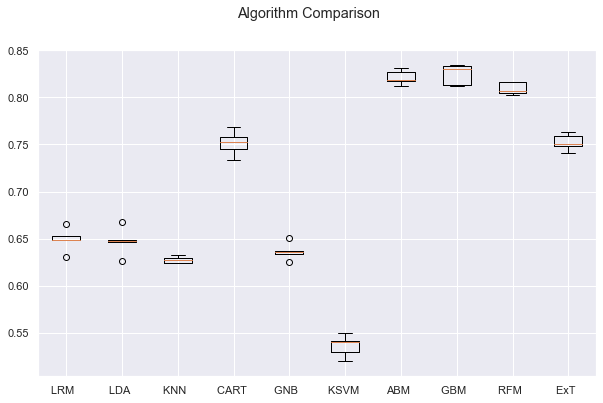

In [370]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [223]:
count_class_0, count_class_1 = supply_v2.campaign_period_sales_positive.value_counts()

# Divide by class
df_class_0 = supply_v2[supply_v2['campaign_period_sales_positive'] == 0]
df_class_1 = supply_v2[supply_v2['campaign_period_sales_positive'] == 1]

In [371]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(11791, 13)

Random over-sampling:
1    11791
0    11791
Name: campaign_period_sales_positive, dtype: int64


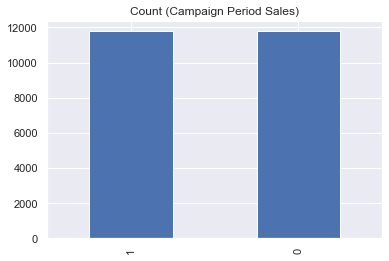

In [372]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.campaign_period_sales_positive.value_counts())

df_test_over.campaign_period_sales_positive.value_counts().plot(kind='bar', title='Count (Campaign Period Sales)');

In [373]:
X = df_test_over.drop('campaign_period_sales_positive', axis = 1)
y = df_test_over.campaign_period_sales_positive

In [374]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=101)

In [375]:
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : 0.647972 (0.014063)
LDA    : 0.647601 (0.014902)
KNN    : 0.744871 (0.009742)
CART   : 0.887835 (0.004172)
GNB    : 0.626663 (0.013866)
KSVM   : 0.530453 (0.005956)
ABM    : 0.824225 (0.002349)
GBM    : 0.831275 (0.004828)
RFM    : 0.922979 (0.003550)
ExT    : 0.917890 (0.003950)


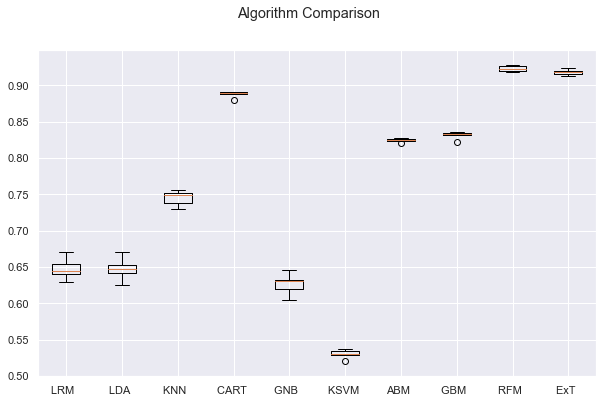

In [376]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### The two contending models: Random Forest and Extra Trees, both with oversampled data

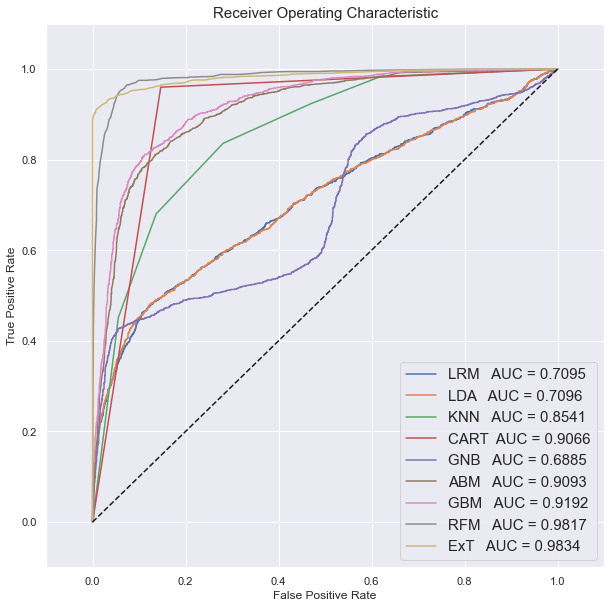

In [430]:
from sklearn.metrics import roc_curve, auc
fig = plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic', fontsize = 15)

# print("Removed model: ", models.pop(5))

for name, model in models: 
    model.fit(X_train, y_train)
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    auroc = round(auc(fpr, tpr), 4)
    plt.plot(fpr, tpr, label='{} AUC = {}'.format(name, auroc))
    
plt.legend(loc='lower right', fontsize = 15)

# Plots 45 degree dotted black line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### AUROC Scores for RFM and ExT are also very close, will perform tuning on both

In [380]:
RFModel = models[-2][1]

from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)


# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }


# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = RFModel, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 48.6min finished


{'n_estimators': 2000, 'max_features': 'auto', 'max_depth': 340}


In [381]:
ExTreeModel = models[-1][1]

from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)


# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }


# Random search of parameters
ext_random = RandomizedSearchCV(estimator = ExTreeModel, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs = -1)
# Fit the model
ext_random.fit(X_train, y_train)
# print results
print(ext_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.3min finished


{'n_estimators': 400, 'max_features': 'auto', 'max_depth': 460}


In [384]:
ext = ExtraTreesClassifier(n_estimators= 2000, max_features= 'auto', max_depth= 340)
ext.fit(X_train, y_train)
ext_predict = ext.predict(X_test)
cv_score = cross_val_score(ext, X, y, cv=10, scoring='roc_auc')
print("=== Extra Trees Model ===")
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, ext_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, ext_predict))
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score: ", cv_score.mean())

=== Extra Trees Model ===


=== Confusion Matrix ===
[[2247  154]
 [ 129 2187]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2401
           1       0.93      0.94      0.94      2316

    accuracy                           0.94      4717
   macro avg       0.94      0.94      0.94      4717
weighted avg       0.94      0.94      0.94      4717



=== Mean AUC Score ===
Mean AUC Score:  0.9857824792669512


In [385]:
rfm = RandomForestClassifier(n_estimators= 400, max_features= 'auto', max_depth= 460)
rfm.fit(X_train, y_train)
rfm_predict = rfm.predict(X_test)
cv_score = cross_val_score(rfm, X, y, cv=10, scoring='roc_auc')
print("=== Random Forest Model ===")
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfm_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfm_predict))
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score: ", cv_score.mean())

=== Random Forest Model ===


=== Confusion Matrix ===
[[2188  213]
 [  67 2249]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2401
           1       0.91      0.97      0.94      2316

    accuracy                           0.94      4717
   macro avg       0.94      0.94      0.94      4717
weighted avg       0.94      0.94      0.94      4717



=== Mean AUC Score ===
Mean AUC Score:  0.9833496110509801


#### Same accuracy, but Extra Trees Model just slightly edges out over the Random Forest Model in AUC score

#### Now to add predictions to the dataset to use later in the regression model

In [388]:
df_test_over['prob_sale'] = ext.predict_proba(X)[:,1]

In [389]:
df_test_over.head()

,historical_sales_volume,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,repurchase_method_NOTICE,last_transaction_channel_known,number_of_employees_large,number_of_employees_medium,number_of_employees_small,language_english,days_since_first_purchase,prior_purchases,campaign_period_sales_positive,prob_sale
3,2.301936e+05,17.0,0,0,1,1,0,0,1,1,13571,1,0,0.0000
6,1.512525e+05,6.0,0,0,1,1,0,1,0,1,12308,0,0,0.0000
7,1.377761e+06,21.0,0,0,1,1,0,1,0,0,12748,1,0,0.0000
10,2.214571e+05,15.0,0,0,1,1,0,0,1,1,13388,1,0,0.6455
12,3.329353e+05,22.0,0,0,0,1,0,0,0,1,11927,2,0,0.0000


In [390]:
df_test_over[(df_test_over['prob_sale'] > 0) & (df_test_over['prob_sale'] < 1)]

,historical_sales_volume,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,repurchase_method_NOTICE,last_transaction_channel_known,number_of_employees_large,number_of_employees_medium,number_of_employees_small,language_english,days_since_first_purchase,prior_purchases,campaign_period_sales_positive,prob_sale
10,221457.142857,15.0,0,0,1,1,0,0,1,1,13388,1,0,0.6455
13,184006.285714,15.0,0,1,1,1,0,0,1,1,12202,1,0,0.0680
16,255984.480000,23.0,0,0,1,1,0,0,0,1,1504,1,0,0.0980
20,363121.000000,15.0,0,0,1,1,0,0,1,1,12673,1,0,0.0630
28,390473.142857,15.0,0,0,1,1,0,0,1,1,11196,1,0,0.0380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,355800.342857,18.0,0,0,0,1,0,0,1,1,17435,2,1,0.8435
3441,120784.300000,33.0,0,0,0,1,0,0,0,0,15305,1,1,0.9750
11075,424290.570667,19.0,0,0,1,1,0,0,0,1,14544,2,1,0.7070
8138,218880.000000,15.0,0,1,1,1,0,0,1,1,9431,1,1,0.5280


In [391]:
df_test_over.to_csv('supply_test_over.csv')

In [392]:
y_test.shape

(4717,)

In [393]:
X_test

,historical_sales_volume,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,repurchase_method_NOTICE,last_transaction_channel_known,number_of_employees_large,number_of_employees_medium,number_of_employees_small,language_english,days_since_first_purchase,prior_purchases
13998,3.489024e+05,6.0,1,1,1,1,0,0,0,1,9904,1
6288,4.384135e+05,18.0,0,0,1,1,0,0,1,1,9979,2
12068,1.428340e+06,6.0,0,0,0,1,0,0,0,0,8943,0
11894,3.157834e+05,18.0,0,0,1,1,0,0,1,0,19385,2
9956,3.837800e+05,15.0,0,0,1,1,0,1,0,1,19566,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15066,2.285244e+05,9.0,0,0,0,1,0,0,0,0,16449,3
9361,9.832890e+05,3.0,0,0,1,1,0,0,0,0,8549,0
6255,7.941240e+05,15.0,0,0,1,1,1,0,0,1,9249,1
12698,1.553408e+05,12.0,0,0,1,1,0,0,1,1,5115,1


In [394]:
pred = ext.predict(X_test)
pred_prob = ext.predict_proba(X_test)

In [395]:
pred_prob

array([[0.   , 1.   ],
       [0.   , 1.   ],
       [0.791, 0.209],
       ...,
       [0.   , 1.   ],
       [0.959, 0.041],
       [0.   , 1.   ]])

In [396]:
prob_table = pd.DataFrame()
prob_table['prob_0'] = pred_prob[:, 0]
prob_table['prob_1'] = 1 - prob_table.prob_0
prob_table['predicted_value'] = pred
prob_table['actual_value'] = y_test.reset_index(drop=True)

In [397]:
prob_table

,prob_0,prob_1,predicted_value,actual_value
0,0.000,1.000,1,1
1,0.000,1.000,1,1
2,0.791,0.209,0,0
3,0.000,1.000,1,1
4,0.000,1.000,1,1
...,...,...,...,...
4712,0.000,1.000,1,1
4713,0.982,0.018,0,0
4714,0.000,1.000,1,1
4715,0.959,0.041,0,0


In [398]:
conditions = [
    (prob_table['predicted_value']== 0), 
    prob_table['predicted_value']== 1]

choices = [prob_table['prob_0'], prob_table['prob_1']]

prob_table['sales_prob'] = np.select(conditions, choices)

In [399]:
prob_table['rank'] = prob_table['sales_prob'].rank(ascending = False, method = 'first')

In [400]:
prob_table.sort_values('rank')

,prob_0,prob_1,predicted_value,actual_value,sales_prob,rank
0,0.0000,1.0000,1,1,1.0000,1.0
1,0.0000,1.0000,1,1,1.0000,2.0
3,0.0000,1.0000,1,1,1.0000,3.0
4,0.0000,1.0000,1,1,1.0000,4.0
5,0.0000,1.0000,1,1,1.0000,5.0
...,...,...,...,...,...,...
1002,0.4990,0.5010,1,0,0.5010,4713.0
1931,0.4990,0.5010,1,0,0.5010,4714.0
2660,0.5010,0.4990,0,0,0.5010,4715.0
3563,0.4990,0.5010,1,0,0.5010,4716.0


In [401]:
prob_table['decile'] = prob_table['rank'].apply(lambda x: 1 + int(10 * ((x/4719) - int(x/4719))))

In [402]:
prob_table['decile'].value_counts()

7     472
3     472
6     472
2     472
9     472
5     472
8     472
4     472
1     471
10    470
Name: decile, dtype: int64

In [403]:
prob_table[prob_table.decile == 1]

,prob_0,prob_1,predicted_value,actual_value,sales_prob,rank,decile
0,0.0,1.0,1,1,1.0,1.0,1
1,0.0,1.0,1,1,1.0,2.0,1
3,0.0,1.0,1,1,1.0,3.0,1
4,0.0,1.0,1,1,1.0,4.0,1
5,0.0,1.0,1,1,1.0,5.0,1
...,...,...,...,...,...,...,...
1038,0.0,1.0,1,1,1.0,467.0,1
1042,0.0,1.0,1,1,1.0,468.0,1
1043,0.0,1.0,1,1,1.0,469.0,1
1045,0.0,1.0,1,1,1.0,470.0,1


In [404]:
prob_table.drop('rank', axis=1, inplace = True)
prob_table.head()

,prob_0,prob_1,predicted_value,actual_value,sales_prob,decile
0,0.000,1.000,1,1,1.000,1
1,0.000,1.000,1,1,1.000,1
2,0.791,0.209,0,0,0.791,9
3,0.000,1.000,1,1,1.000,1
4,0.000,1.000,1,1,1.000,1


In [405]:
predictions = pd.DataFrame()
predictions[['Defaulter','Probability','Decile']] = prob_table[['actual_value', 'sales_prob', 'decile']]

In [406]:
predictions['Non-Defaulter'] = 1-predictions['Defaulter']

In [407]:
df1 = pd.pivot_table(data=predictions,index=['Decile'],values=['Defaulter','Non-Defaulter','Probability'],
                     aggfunc={'Defaulter':[np.sum],
                              'Non-Defaulter':[np.sum],
                              'Probability' : [np.min,np.max]})
df1

Defaulter Non-Defaulter Probability        
             sum           sum        amax    amin
Decile                                            
1            462             9      1.0000  1.0000
2            471             1      1.0000  1.0000
3            467             5      1.0000  1.0000
4            465             7      1.0000  1.0000
5            192           280      1.0000  0.9825
6             27           445      0.9825  0.9370
7             32           440      0.9370  0.8815
8             37           435      0.8810  0.8105
9             60           412      0.8105  0.6935
10           103           367      0.6930  0.5005

In [408]:
df1.reset_index()

Decile Defaulter Non-Defaulter Probability        
               sum           sum        amax    amin
0      1       462             9      1.0000  1.0000
1      2       471             1      1.0000  1.0000
2      3       467             5      1.0000  1.0000
3      4       465             7      1.0000  1.0000
4      5       192           280      1.0000  0.9825
5      6        27           445      0.9825  0.9370
6      7        32           440      0.9370  0.8815
7      8        37           435      0.8810  0.8105
8      9        60           412      0.8105  0.6935
9     10       103           367      0.6930  0.5005

In [409]:
df1.columns = ['Defaulter_Count','Non-Defaulter_Count','max_score','min_score']
df1['Total_Cust'] = df1['Defaulter_Count']+df1['Non-Defaulter_Count']
df1

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust
Decile,,,,,
1,462,9,1.0000,1.0000,471
2,471,1,1.0000,1.0000,472
3,467,5,1.0000,1.0000,472
4,465,7,1.0000,1.0000,472
5,192,280,1.0000,0.9825,472
6,27,445,0.9825,0.9370,472
7,32,440,0.9370,0.8815,472
8,37,435,0.8810,0.8105,472
9,60,412,0.8105,0.6935,472


In [410]:
df2 = df1

In [411]:
df2['Default_Rate'] = (df2['Defaulter_Count'] / df2['Total_Cust']).apply('{0:.2%}'.format)
default_sum = df2['Defaulter_Count'].sum()
non_default_sum = df2['Non-Defaulter_Count'].sum()
df2['Default %'] = (df2['Defaulter_Count']/default_sum).apply('{0:.2%}'.format)
df2['Non_Default %'] = (df2['Non-Defaulter_Count']/non_default_sum).apply('{0:.2%}'.format)
df2

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %
Decile,,,,,,,,
1,462,9,1.0000,1.0000,471,98.09%,19.95%,0.37%
2,471,1,1.0000,1.0000,472,99.79%,20.34%,0.04%
3,467,5,1.0000,1.0000,472,98.94%,20.16%,0.21%
4,465,7,1.0000,1.0000,472,98.52%,20.08%,0.29%
5,192,280,1.0000,0.9825,472,40.68%,8.29%,11.66%
6,27,445,0.9825,0.9370,472,5.72%,1.17%,18.53%
7,32,440,0.9370,0.8815,472,6.78%,1.38%,18.33%
8,37,435,0.8810,0.8105,472,7.84%,1.60%,18.12%
9,60,412,0.8105,0.6935,472,12.71%,2.59%,17.16%


In [412]:
df2['ks_stats'] = np.round(((df2['Defaulter_Count'] / df2['Defaulter_Count'].sum()).cumsum() -(df2['Non-Defaulter_Count'] / df2['Non-Defaulter_Count'].sum()).cumsum()), 4) * 100
df2

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats
Decile,,,,,,,,,
1,462,9,1.0000,1.0000,471,98.09%,19.95%,0.37%,19.57
2,471,1,1.0000,1.0000,472,99.79%,20.34%,0.04%,39.87
3,467,5,1.0000,1.0000,472,98.94%,20.16%,0.21%,59.82
4,465,7,1.0000,1.0000,472,98.52%,20.08%,0.29%,79.61
5,192,280,1.0000,0.9825,472,40.68%,8.29%,11.66%,76.24
6,27,445,0.9825,0.9370,472,5.72%,1.17%,18.53%,58.87
7,32,440,0.9370,0.8815,472,6.78%,1.38%,18.33%,41.93
8,37,435,0.8810,0.8105,472,7.84%,1.60%,18.12%,25.41
9,60,412,0.8105,0.6935,472,12.71%,2.59%,17.16%,10.84


In [413]:
flag = lambda x: '*****' if x == df2['ks_stats'].max() else ''
df2['max_ks'] = df2['ks_stats'].apply(flag)
df2

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks
Decile,,,,,,,,,,
1,462,9,1.0000,1.0000,471,98.09%,19.95%,0.37%,19.57,
2,471,1,1.0000,1.0000,472,99.79%,20.34%,0.04%,39.87,
3,467,5,1.0000,1.0000,472,98.94%,20.16%,0.21%,59.82,
4,465,7,1.0000,1.0000,472,98.52%,20.08%,0.29%,79.61,*****
5,192,280,1.0000,0.9825,472,40.68%,8.29%,11.66%,76.24,
6,27,445,0.9825,0.9370,472,5.72%,1.17%,18.53%,58.87,
7,32,440,0.9370,0.8815,472,6.78%,1.38%,18.33%,41.93,
8,37,435,0.8810,0.8105,472,7.84%,1.60%,18.12%,25.41,
9,60,412,0.8105,0.6935,472,12.71%,2.59%,17.16%,10.84,


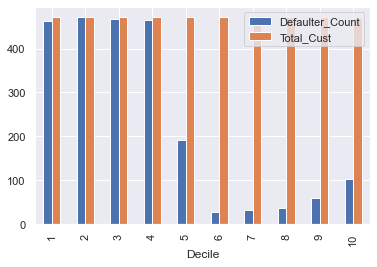

In [414]:
df2[['Defaulter_Count', 'Total_Cust']].plot( kind = 'bar')

In [415]:
df_test1 = df2.copy()
df_test1['default_cum%'] = np.round(((df2['Defaulter_Count'] / df2['Defaulter_Count'].sum()).cumsum()), 4) * 100
df_test1

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks,default_cum%
Decile,,,,,,,,,,,
1,462,9,1.0000,1.0000,471,98.09%,19.95%,0.37%,19.57,,19.95
2,471,1,1.0000,1.0000,472,99.79%,20.34%,0.04%,39.87,,40.28
3,467,5,1.0000,1.0000,472,98.94%,20.16%,0.21%,59.82,,60.45
4,465,7,1.0000,1.0000,472,98.52%,20.08%,0.29%,79.61,*****,80.53
5,192,280,1.0000,0.9825,472,40.68%,8.29%,11.66%,76.24,,88.82
6,27,445,0.9825,0.9370,472,5.72%,1.17%,18.53%,58.87,,89.98
7,32,440,0.9370,0.8815,472,6.78%,1.38%,18.33%,41.93,,91.36
8,37,435,0.8810,0.8105,472,7.84%,1.60%,18.12%,25.41,,92.96
9,60,412,0.8105,0.6935,472,12.71%,2.59%,17.16%,10.84,,95.55


<Figure size 1080x1440 with 0 Axes>

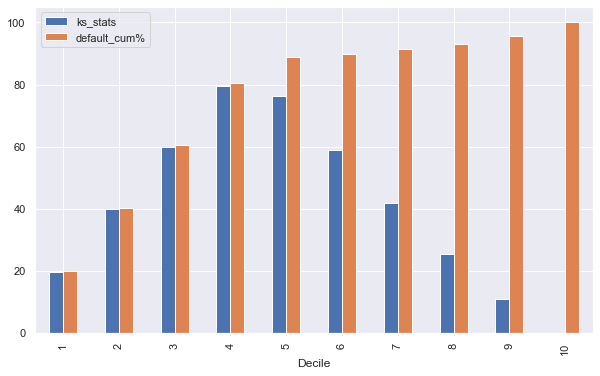

In [416]:
 fig = plt.figure(figsize = (15,20))
    
df_test1[['ks_stats', 'default_cum%']].plot( kind = 'bar', figsize = (10,6))

In [417]:
df_test1['Gain'] = df_test1['default_cum%']

In [418]:
df_test1['Lift'] = df_test1['Gain'] / (10 * df_test1.index)

In [419]:
df_test1

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks,default_cum%,Gain,Lift
Decile,,,,,,,,,,,,,
1,462,9,1.0000,1.0000,471,98.09%,19.95%,0.37%,19.57,,19.95,19.95,1.995000
2,471,1,1.0000,1.0000,472,99.79%,20.34%,0.04%,39.87,,40.28,40.28,2.014000
3,467,5,1.0000,1.0000,472,98.94%,20.16%,0.21%,59.82,,60.45,60.45,2.015000
4,465,7,1.0000,1.0000,472,98.52%,20.08%,0.29%,79.61,*****,80.53,80.53,2.013250
5,192,280,1.0000,0.9825,472,40.68%,8.29%,11.66%,76.24,,88.82,88.82,1.776400
6,27,445,0.9825,0.9370,472,5.72%,1.17%,18.53%,58.87,,89.98,89.98,1.499667
7,32,440,0.9370,0.8815,472,6.78%,1.38%,18.33%,41.93,,91.36,91.36,1.305143
8,37,435,0.8810,0.8105,472,7.84%,1.60%,18.12%,25.41,,92.96,92.96,1.162000
9,60,412,0.8105,0.6935,472,12.71%,2.59%,17.16%,10.84,,95.55,95.55,1.061667


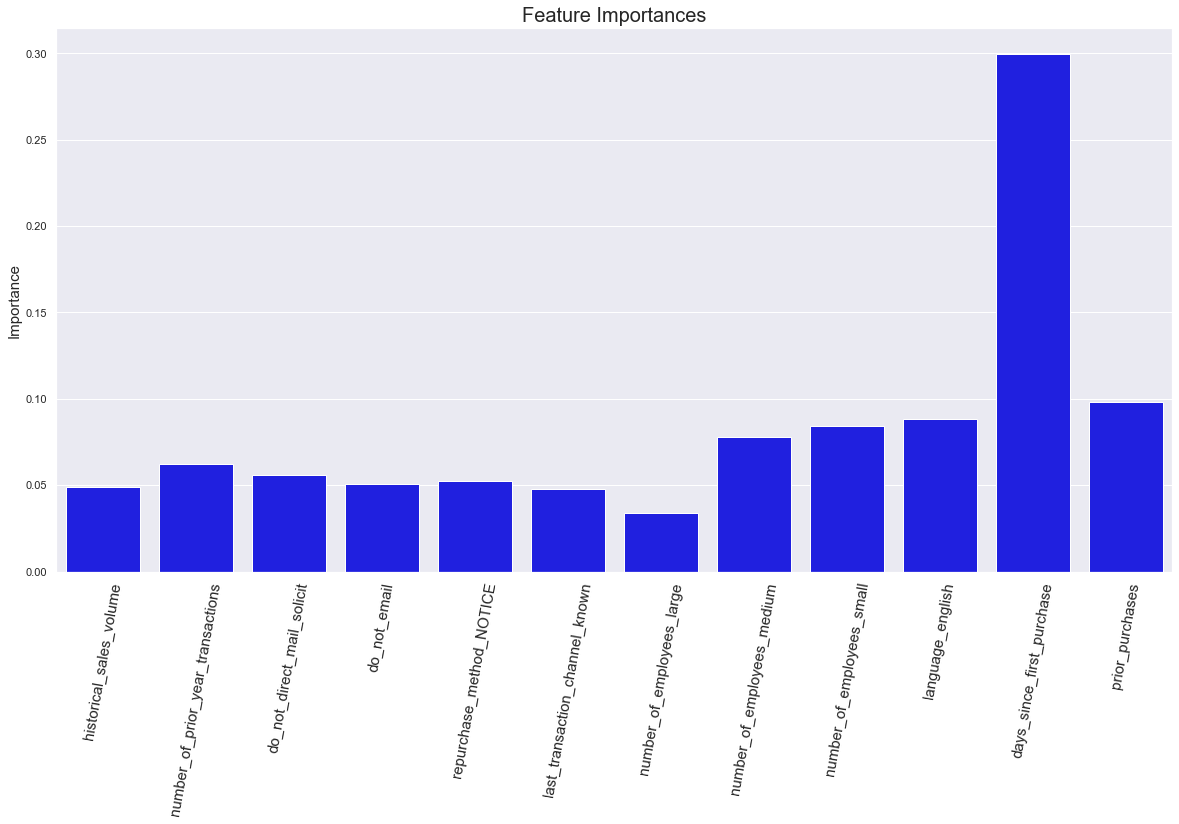

,Importance Coef,Features
10,0.299740,days_since_first_purchase
11,0.097990,prior_purchases
9,0.088417,language_english
8,0.084433,number_of_employees_small
7,0.078048,number_of_employees_medium
1,0.062344,number_of_prior_year_transactions
2,0.055729,do_not_direct_mail_solicit
4,0.052378,repurchase_method_NOTICE
3,0.050749,do_not_email
0,0.048713,historical_sales_volume


In [10]:
from xgboost import XGBClassifier

plt.figure(figsize=(20,10))

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
sns.barplot(x = X_train.columns, y = model.feature_importances_, color='Blue')
plt.xticks(rotation = 80, fontsize = 15)
plt.title('Feature Importances', fontsize = 20)
plt.ylabel('Importance', fontsize=15)
plt.show()

feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : X_train.columns})
feature_importances.nlargest(100, 'Importance Coef')

In [421]:
X_test_decile = X_test.reset_index()

In [422]:
X_test_decile

,index,historical_sales_volume,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,repurchase_method_NOTICE,last_transaction_channel_known,number_of_employees_large,number_of_employees_medium,number_of_employees_small,language_english,days_since_first_purchase,prior_purchases
0,13998,3.489024e+05,6.0,1,1,1,1,0,0,0,1,9904,1
1,6288,4.384135e+05,18.0,0,0,1,1,0,0,1,1,9979,2
2,12068,1.428340e+06,6.0,0,0,0,1,0,0,0,0,8943,0
3,11894,3.157834e+05,18.0,0,0,1,1,0,0,1,0,19385,2
4,9956,3.837800e+05,15.0,0,0,1,1,0,1,0,1,19566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4712,15066,2.285244e+05,9.0,0,0,0,1,0,0,0,0,16449,3
4713,9361,9.832890e+05,3.0,0,0,1,1,0,0,0,0,8549,0
4714,6255,7.941240e+05,15.0,0,0,1,1,1,0,0,1,9249,1
4715,12698,1.553408e+05,12.0,0,0,1,1,0,0,1,1,5115,1


In [423]:
X_test_decile['decile'] = prob_table['decile']

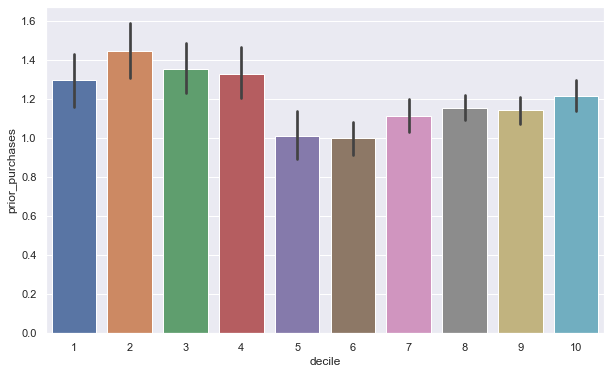

In [428]:
plt.figure(figsize =(10, 6))
sns.barplot(x = 'decile', y = 'prior_purchases', data = X_test_decile)

In [427]:
df_test1.to_excel('Lift_Chart.xlsx')